In [76]:
import json
import pandas as pd
import glob
import typing as tp

from pprint import pprint

import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline
mpl.rcParams['figure.figsize'] = (20, 5)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [112]:
# glob.glob('data/*.json')

def collect_data(filenames: tp.Iterable[str]):
    for fl in sorted(filenames):
        with open(fl, 'r') as f:
            for line in f:
                if line.strip():
                    try:
                        item = json.loads(line)
                    except json.JSONDecodeError as e:
                        print(e, line)
                        continue
                    yield item
                        
                    
data = list(collect_data(['data/data-0707:1101.json']))

In [111]:
m = data[0]
pprint(m.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


In [113]:
df = pd.DataFrame(
    columns=['created_at', 'retweeted'],
    data=collect_data(glob.glob('data/*.json'))
)
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)
df.head()

Unterminated string starting at: line 1 column 824 (char 823) {"created_at":"Sat Jul 07 18:42:24 +0000 2018","id":1015667363717541889,"id_str":"1015667363717541889","text":"RT @goal: GOAL! Kramaric heads Croatia level. Game on! #RUSCRO https:\/\/t.co\/h2CZVFzhMF","source":"\u003ca href=\"https:\/\/about.twitter.com\/products\/tweetdeck\" rel=\"nofollow\"\u003eTweetDeck\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":19361374,"id_str":"19361374","name":"Goal USA","screen_name":"GoalUSA","location":"Everywhere","url":"http:\/\/www.goal.com\/en-us\/","description":"One sport, One destination, One obsession.","translator_type":"none","protected":false,"verified":true,"followers_count":48391,"friends_count":86,"listed_count":1083,"favour


,retweeted
created_at,
2018-07-07 18:04:42,False
2018-07-07 18:04:42,False
2018-07-07 18:04:42,False
2018-07-07 18:04:42,False
2018-07-07 18:04:42,False


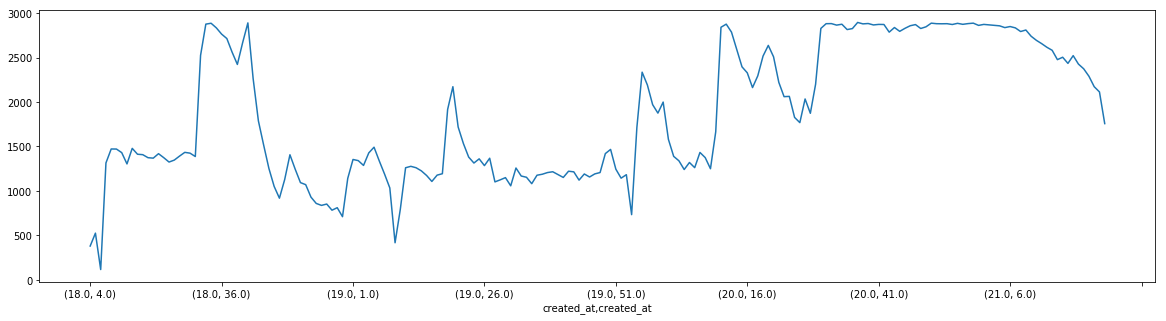

In [115]:
df.groupby([df.index.hour, df.index.minute])['retweeted'].count().plot()